In [ ]:
!git clone https://github.com/UnderGroundVerse/Neural-Astar-using-Transformer.git

Cloning into 'Neural-Astar-using-Transformer'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 45 (delta 13), reused 37 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 704.82 KiB | 5.38 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
%cd Neural-Astar-using-Transformer

/content/Neural-Astar-using-Transformer


In [ ]:
!kaggle datasets download balraj98/deepglobe-road-extraction-dataset

Dataset URL: https://www.kaggle.com/datasets/balraj98/deepglobe-road-extraction-dataset
License(s): other




  0%|          | 0.00/3.79G [00:00<?, ?B/s]
  0%|          | 1.00M/3.79G [00:00<1:03:31, 1.07MB/s]
  0%|          | 2.00M/3.79G [00:01<38:23, 1.77MB/s]  
  0%|          | 3.00M/3.79G [00:01<27:29, 2.47MB/s]
  0%|          | 4.00M/3.79G [00:01<22:11, 3.06MB/s]
  0%|          | 5.00M/3.79G [00:01<19:18, 3.51MB/s]
  0%|          | 6.00M/3.79G [00:02<17:50, 3.80MB/s]
  0%|          | 7.00M/3.79G [00:02<16:55, 4.00MB/s]
  0%|          | 8.00M/3.79G [00:02<16:30, 4.11MB/s]
  0%|          | 9.00M/3.79G [00:02<16:19, 4.15MB/s]
  0%|          | 10.0M/3.79G [00:03<15:30, 4.37MB/s]
  0%|          | 11.0M/3.79G [00:03<15:03, 4.50MB/s]
  0%|          | 12.0M/3.79G [00:03<18:14, 3.71MB/s]
  0%|          | 13.0M/3.79G [00:03<15:20, 4.41MB/s]
  0%|          | 14.0M/3.79G [00:04<15:28, 4.37MB/s]
  0%|          | 15.0M/3.79G [00:04<15:31, 4.36MB/s]
  0%|          | 16.0M/3.79G [00:04<15:48, 4.28MB/s]
  0%|          | 17.0M/3.79G [00:04<16:20, 4.14MB/s]
  0%|          | 18.0M/3.79G [00:05<19:01, 3.55MB/

In [ ]:
!unzip deepglobe-road-extraction-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


True


In [ ]:
import pandas as pd


data = pd.read_csv('metadata.csv')

In [ ]:
import cv2 as cv
import random
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
x_train_paths = data['sat_image_path']
y_train_paths = data['mask_path']



from PIL import Image

x_train = []
y_train = []

for path in x_train_paths[:2000]:
  img = Image.open(path)
  img = img.resize((256, 256))
  x_train.append(np.asarray(img))

for path in y_train_paths[:2000]:
  img = Image.open(path)
  img = img.resize((256, 256))
  img = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
  img = np.expand_dims(img, axis=-1)

  y_train.append(img)



KeyboardInterrupt: 

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2000, 256, 256, 3)
(2000, 256, 256, 1)


In [ ]:
x_train = x_train / 255.0
y_train = y_train / 255.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
import os


test_images = []

folder_path = 'test'

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        img = img.resize((256, 256))
        test_images.append(np.asarray(img))

test_images = np.array(test_images)

In [ ]:
print(test_images.shape)

(1101, 256, 256, 3)


In [ ]:
test_images = test_images  / 255.0

In [ ]:
# val_images = test_images[:800]
# test_images = test_images[800:-1]
# print(test_images.shape)
# print(val_images.shape)

(300, 256, 256, 3)
(800, 256, 256, 3)


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("GPU is available and memory growth is enabled.")
    except RuntimeError as e:
        print(f"Error enabling memory growth: {e}")
else:
    print("No GPU available, using CPU.")

Num GPUs Available:  1
Error enabling memory growth: Physical devices cannot be modified after being initialized


In [ ]:
import keras as ks

from keras import layers





input_shape = (256, 256, 3)





enc_dec_CNN = ks.models.Sequential([

layers.Input(shape=input_shape),
layers.Conv2D(32, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), padding='same'),
layers.Conv2D(128, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Dropout(0.5),
layers.BatchNormalization(),

layers.Conv2D(256, (3, 3), strides=2 ,activation='relu', padding='same'),
layers.Conv2D(256, (3, 3), strides=2 ,activation='relu', padding='same'),


layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(32, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(3, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(3, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.BatchNormalization(),

layers.Conv2D(1, (3,3) ,strides=1 , padding='same' ,activation='sigmoid'),





])



enc_dec_CNN.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [ ]:

enc_dec_CNN.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


In [ ]:
enc_dec_CNN.load_weights('enc_dec_CNN5.keras') #

In [ ]:
#enc_dec_CNN.fit(x_train, y_train ,epochs=200, batch_size=8)

Epoch 1/200


ValueError: in user code:

    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\pc\Desktop\enc\.conda\lib\site-packages\keras\engine\input_spec.py", line 199, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential_1" expects 1 input(s), but it received 209 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:2' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:3' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:4' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:5' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:6' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:7' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:8' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:9' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:10' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:11' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:12' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:13' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:14' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:15' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:16' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:17' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:18' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:19' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:20' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:21' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:22' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:23' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:24' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:25' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:26' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:27' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:28' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:29' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:30' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:31' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:32' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:33' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:34' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:35' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:36' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:37' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:38' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:39' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:40' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:41' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:42' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:43' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:44' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:45' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:46' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:47' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:48' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:49' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:50' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:51' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:52' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:53' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:54' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:55' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:56' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:57' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:58' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:59' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:60' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:61' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:62' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:63' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:64' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:65' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:66' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:67' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:68' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:69' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:70' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:71' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:72' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:73' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:74' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:75' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:76' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:77' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:78' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:79' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:80' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:81' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:82' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:83' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:84' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:85' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:86' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:87' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:88' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:89' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:90' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:91' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:92' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:93' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:94' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:95' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:96' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:97' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:98' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:99' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:100' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:101' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:102' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:103' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:104' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:105' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:106' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:107' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:108' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:109' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:110' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:111' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:112' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:113' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:114' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:115' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:116' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:117' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:118' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:119' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:120' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:121' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:122' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:123' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:124' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:125' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:126' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:127' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:128' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:129' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:130' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:131' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:132' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:133' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:134' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:135' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:136' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:137' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:138' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:139' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:140' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:141' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:142' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:143' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:144' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:145' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:146' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:147' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:148' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:149' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:150' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:151' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:152' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:153' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:154' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:155' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:156' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:157' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:158' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:159' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:160' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:161' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:162' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:163' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:164' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:165' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:166' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:167' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:168' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:169' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:170' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:171' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:172' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:173' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:174' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:175' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:176' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:177' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:178' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:179' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:180' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:181' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:182' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:183' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:184' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:185' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:186' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:187' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:188' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:189' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:190' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:191' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:192' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:193' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:194' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:195' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:196' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:197' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:198' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:199' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:200' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:201' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:202' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:203' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:204' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:205' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:206' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:207' shape=(8, 256, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:208' shape=(8, 256, 3) dtype=uint8>]


In [ ]:
#enc_dec_CNN.save('enc_dec_CNN5.keras')
#enc_dec_CNN.save('enc_dec_CNN_weights5.h5')

(1, 256, 256, 3)


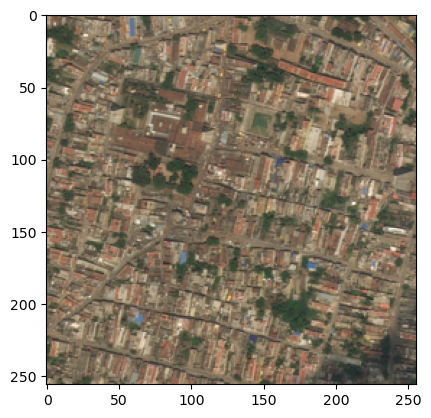

In [ ]:

test_image = test_images[50]
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

plt.imshow(test_image[0])
plt.show()

In [ ]:
pred_image = enc_dec_CNN.predict(test_image)
pred_image = pred_image[0]
threshold = 0.1
pred_image = np.where(pred_image > threshold, 1, 0)
print(pred_image)

[[[1]
  [1]
  [1]
  ...
  [0]
  [0]
  [0]]

 [[1]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [1]]]


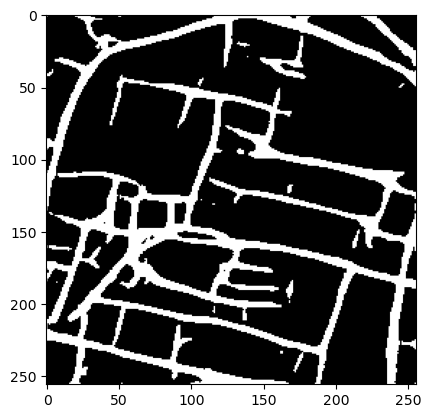

In [ ]:
plt.imshow(pred_image , cmap='gray')
plt.show()